In [1]:
import pandas as pd

In [3]:
cctv_seoul = pd.read_csv('./data/01.CCTV_in_Seoul.csv', encoding = 'utf-8')

In [4]:
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [14]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [13]:
type(cctv_seoul.columns)

pandas.core.indexes.base.Index

In [15]:
#컬럼명 수정
#rename
cctv_seoul.rename(columns ={cctv_seoul.columns[0] : '구별'}, inplace = True)

In [16]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [18]:
cctv_seoul.shape

(25, 6)

In [17]:
cctv_seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1179.080000,764.760000,159.480000,205.200000,385.880000
std,556.728983,415.510257,104.132976,137.877059,182.479981
min,485.000000,238.000000,21.000000,30.000000,81.000000
25%,748.000000,464.000000,78.000000,103.000000,292.000000
50%,1015.000000,573.000000,142.000000,184.000000,377.000000
75%,1496.000000,1070.000000,218.000000,269.000000,467.000000
max,2780.000000,1843.000000,430.000000,584.000000,932.000000


In [19]:
pop_seoul = pd.read_excel('./data/01.population_in_Seoul.xls', encoding = 'utf-8')

In [20]:
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [21]:
#첫 3행을 고려해 재시도
pop_seoul = pd.read_excel('./data/01.population_in_Seoul.xls',
                          header = 2, #0, 1, 2로 2부터(3번째 행부터)
                          parse_cols = 'B, D, G, J, N', #excel 상의 colum 선택
                          encoding = 'utf-8')

In [22]:
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [24]:
pop_seoul.rename(columns = {pop_seoul.columns[0] : '구별',
                           pop_seoul.columns[1] : '인구수',
                           pop_seoul.columns[2] : '한국인',
                           pop_seoul.columns[3] : '외국인',
                           pop_seoul.columns[4] : '고령자'}, inplace = True)
#in R: colnames(pop_seoul)[1] <- '구별'

In [25]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [26]:
pop_seoul.describe()

,인구수,한국인,외국인,고령자
count,2.600000e+01,2.600000e+01,26.000000,2.600000e+01
mean,7.844311e+05,7.636129e+05,20818.153846,1.016506e+05
std,1.924156e+06,1.873421e+06,51598.169516,2.491801e+05
min,1.332400e+05,1.243120e+05,2017.000000,2.076400e+04
25%,3.348055e+05,3.316718e+05,4489.000000,4.831200e+04
50%,4.135115e+05,4.051690e+05,9079.500000,5.439750e+04
75%,4.907855e+05,4.864445e+05,14901.500000,6.431075e+04
max,1.019760e+07,9.926968e+06,270636.000000,1.321458e+06


In [27]:
pop_seoul.shape

(27, 5)

---

In [28]:
cctv_seoul.sort_values(by = '소계', ascending = True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [29]:
cctv_seoul['최근증가율'] = ((cctv_seoul['2016년'] + cctv_seoul['2015년']
                      + cctv_seoul['2014년']) / cctv_seoul['2013년도 이전']) * 100

In [30]:
cctv_seoul.sort_values(by = '최근증가율', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


----

In [31]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [32]:
pop_seoul2 = pop_seoul.copy()

In [33]:
pop_seoul2.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [34]:
pop_seoul2.drop(['고령자'], inplace = True)

ValueError: labels ['고령자'] not contained in axis

In [37]:
pop_seoul2[0:3]

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [38]:
pop_seoul.drop([0], inplace = True)

In [39]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [41]:
len(pop_seoul['구별'].unique())

26

In [42]:
pop_seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [43]:
pop_seoul.isnull().sum()

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [45]:
pop_seoul.iloc[25,]

구별     NaN
인구수    NaN
한국인    NaN
외국인    NaN
고령자    NaN
Name: 26, dtype: object

In [46]:
pop_seoul.iloc[25]

구별     NaN
인구수    NaN
한국인    NaN
외국인    NaN
고령자    NaN
Name: 26, dtype: object

In [47]:
pop_seoul.drop([26], inplace = True)

In [49]:
pop_seoul.isnull().sum()

구별     0
인구수    0
한국인    0
외국인    0
고령자    0
dtype: int64

In [50]:
#각 특성인구별 비율 추가
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

In [51]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [53]:
#인구수 top 5
pop_seoul.sort_values(by = '인구수', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [54]:
#외국인 수 top 5
pop_seoul.sort_values(by = '외국인', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797
20,동작구,412520.0,400456.0,12064.0,56013.0,2.924464,13.578251
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062


----

In [63]:
data_result = pd.merge(cctv_seoul, pop_seoul, on = '구별')

In [56]:
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [57]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [58]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [64]:
#행방향 삭제: drop
#열방향 삭제: del
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
#in R:
# test2 <- test[, 2:4]
# test2 <- test[, -c(1, 2)]

In [65]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [66]:
#inedx를 '구'로 지정
#in R: rownames(test) <- test$구별
data_result.set_index('구별', inplace = True)

In [67]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [69]:
import numpy as np

#상관관계 파악/ 상관계수 구하기: np.corrcoef
np.corrcoef(data_result['고령자비율'], data_result['소계'])

#in R:
#cor(test$Sepal.Width, test$Petal.Length)

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [70]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [71]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[ 1.        ,  0.30634228],
       [ 0.30634228,  1.        ]])

In [72]:
data_result.sort_values(by = '소계', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [73]:
data_result.sort_values(by = '인구수', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


---

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
#그래프 결과를 출력 세션에 나타나게 하는 설정

In [76]:
#matplotlib이 한글 지원하지 않아 폰트 변경
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
else:
    print('Unknown System')

In [77]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


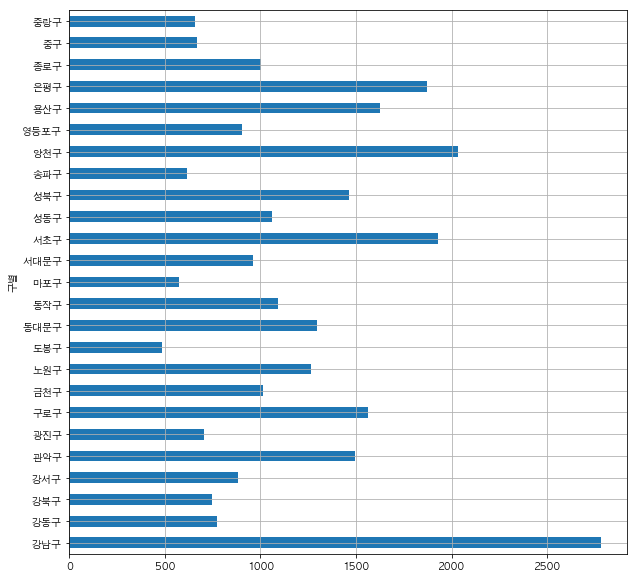

In [79]:
data_result['소계'].plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

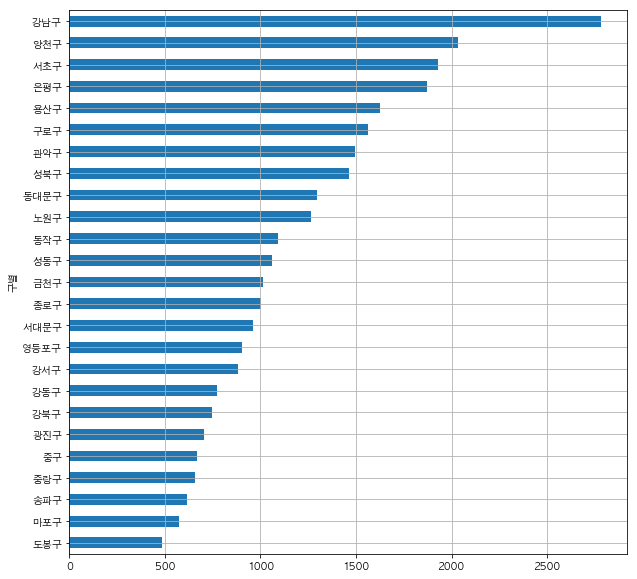

In [80]:
data_result['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

구 별  감시 카메라 수.<br/>
강남구의 카메라 수가 월등히 많다. 도봉구는 그 반대

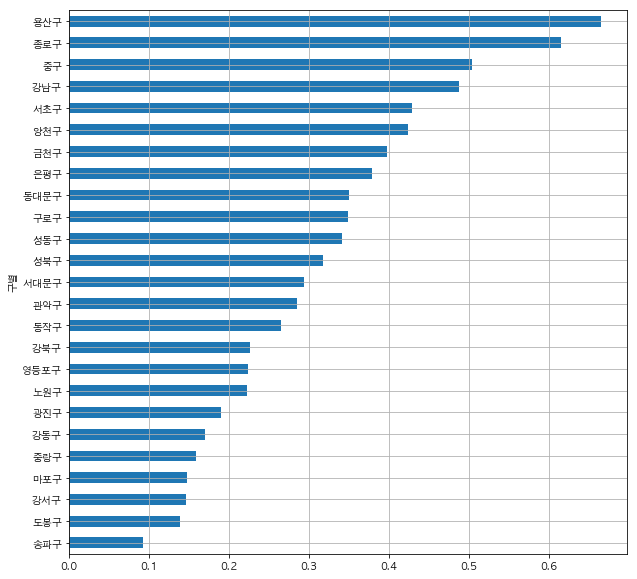

In [82]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

규봉: 하지만 인구 대비 카메라 수를 보았을 때, 강남과 도봉구의 위치가 변한다.<br/>
유의할 점은 이 표는 단순히 '인구대비'를 본 것이지, 절대적인 평가 잣대가 될 수 없다. <br/>
ex) 구 면적 대비 카메라 수 등 고려해야할 사항이 더 많다.

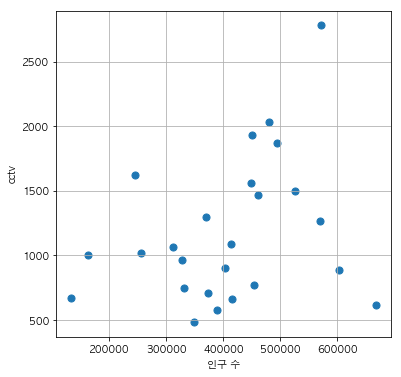

In [83]:
plt.figure(figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.xlabel('인구 수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [84]:
#np.polyfit()
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([  1.30916415e-03,   6.45066497e+02])

In [86]:
#y축
f1 = np.poly1d(fp1)

#x축
fx = np.linspace(100000, 700000, 100)

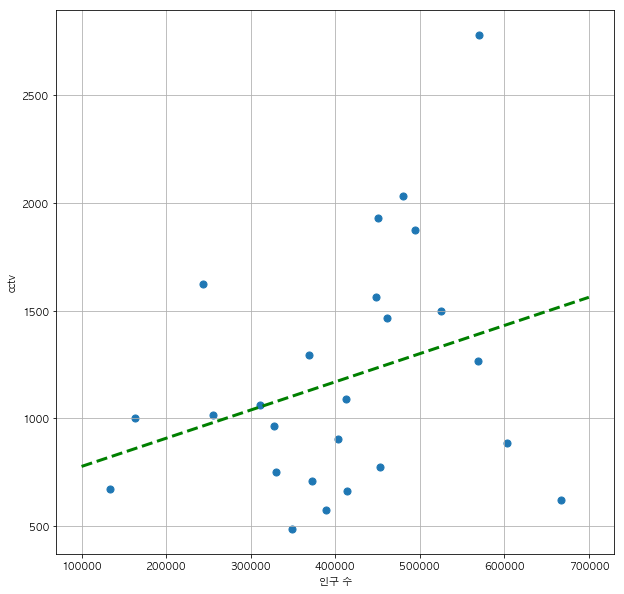

In [87]:
plt.figure(figsize = (10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
plt.xlabel('인구 수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [88]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

#규봉: .copy() 대안으로 sorting 후 assign
df_sort = data_result.sort_values(by = '오차', ascending = False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


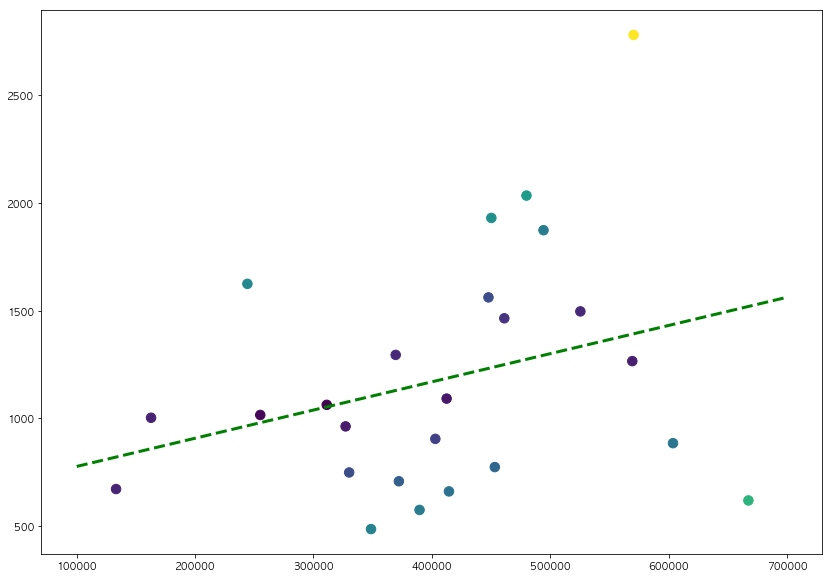

In [90]:
plt.figure(figsize = (14, 10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c = data_result['오차'], s = 90)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

plt.show()

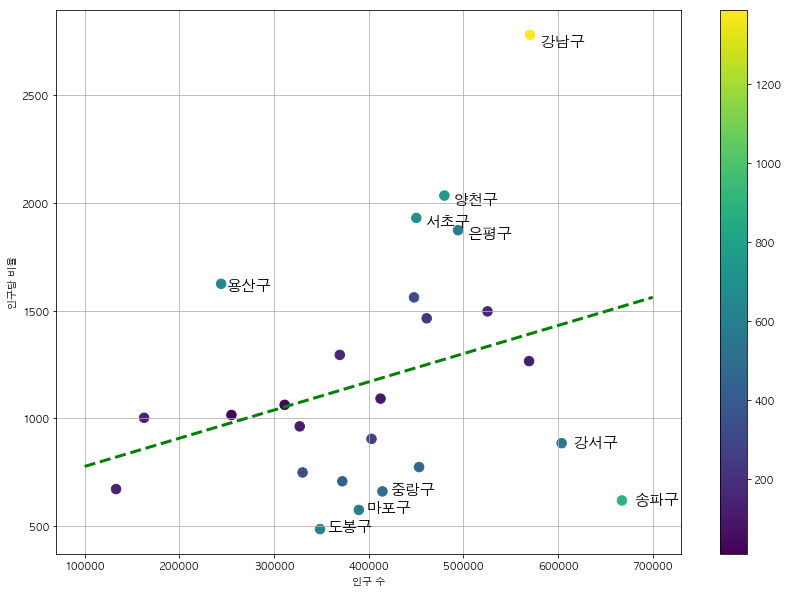

In [91]:
plt.figure(figsize = (14, 10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c = data_result['오차'], s = 90)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')


for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98,
            df_sort.index[n], fontsize = 15)
    
plt.xlabel('인구 수')
plt.ylabel('인구당 비율')

plt.colorbar()
plt.grid()


plt.show()

- 직선 위는 서울시 전체로 보았을 때 보다 인구당 cctv가 많은 지역
- 강남구와 송파구는 확연히 차이가 난다.
- 지금까지 단순히 '송파구'가 서울 내에서 인구 대비 적은 cctv를 갖고 있다는 사실을 시각화한 것. 